In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import os
root_dir = "/Users/arpita/DSL/nypl_images/"
path = os.path.join(root_dir,"vec.txt")
indices = os.path.join(root_dir,"op.txt")
f = open(path,"r")
p = open(indices,"r")

image_indices = {}
image_vectors = []
list = f.readlines()
indices = p.readlines()
indices_list = {}
i = 0
for row in indices:
    inds = row.split(":")
    indices_list[i] = (int(inds[0].replace(".jpg","")))
    i = i+1
print len(indices_list)





25996


In [10]:
i = 0
for line in list:
    splited_line = line.rstrip('\r\n').split(' ')
    embedding = [float(x) for x in splited_line[0:]]
    ind = indices_list[i]
    if len(embedding) != 1024: 
        print ind
        continue
    image_indices[ind] = embedding
    image_vectors.append(embedding)
    i = i+1

In [11]:
X = np.array(image_vectors)
'''
si = set()
for ind,x in image_indices.items():
    si.add(len(x))
    if len(x) != 1024: print ind

print si
'''

'\nsi = set()\nfor ind,x in image_indices.items():\n    si.add(len(x))\n    if len(x) != 1024: print ind\n\nprint si\n'

In [12]:
import pickle
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
path = os.path.join(root_dir,"nypl_embeds.pkl")
pickle.dump(image_indices, open(path, "wb" ))

knn_indices = {}
knn_distances = {}
for key in image_indices.keys():
    distances, indices = nbrs.kneighbors([image_indices[key]])
    knn_indices[key] = indices[0]
    knn_distances[key] = distances[0]


In [13]:
import pickle

path = os.path.join(root_dir,"knn_indices.pkl")
pickle.dump(knn_indices, open( path, "wb" ))
path = os.path.join(root_dir,"knn_dist.pkl")
pickle.dump(knn_distances, open(path, "wb" ))
print knn_indices[0]

[    0 25331 20553 22219 11108]


In [14]:
input = open("images.txt","r")
index_to_titles = {}
titles = input.readlines()
for ind, title in enumerate(titles):
    index_to_titles[ind] = title

IOError: [Errno 2] No such file or directory: 'images.txt'

In [15]:
import os
import pickle

root_dir = "/Users/arpita/DSL/nypl_images/"
from IPython.display import Image,display
path = os.path.join(root_dir,"knn_indices.pkl")
knn_indices = pickle.load(open(path,"rb"))

30981


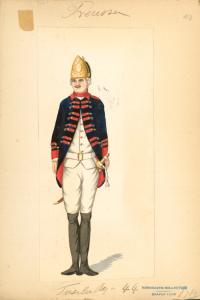

30755


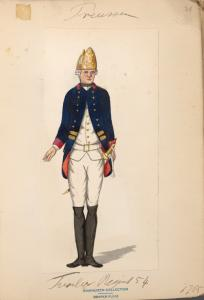

31033


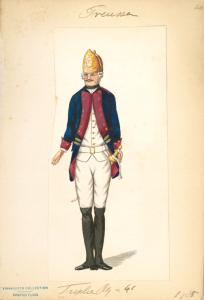

30992


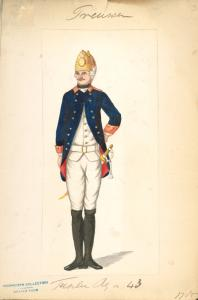

30852


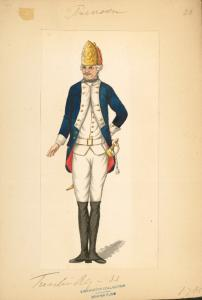

In [18]:
from matplotlib import pyplot as plt
#give any id from 0 to 534 in the following line and check
#pictures look really relevant to me
#print knn_indices[136]
names = [indices_list[index] for index in knn_indices[30981]]
for name in names:
    print name
    name  = str(root_dir) + "/Images/" + str(name) + ".jpg"
    img = Image(filename = name)
    display(img)
    #img = Image(filename = str(name).rstrip('\r\n'))
#for name in names:
#    img = Image(filename = str(name).rstrip('\r\n'))
#    display(img)



In [40]:
import pickle

pkl = open("knn_indices.pkl","rb")
knn_indices = pickle.load(pkl)

edges = {}

for key,values in knn_indices.items():
    edges[key] = []
    #edges[key] = set()
    for val in values:
        ls = edges.get(key)
        ls.append(val)
        edges[key] = ls
 
pickle.dump(edges, open("images_graph_edges.pkl", "wb" ))



In [41]:
import networkx as nx
import pickle
import operator

edges_file = open("images_graph_edges.pkl","rb")
edges = pickle.load(edges_file)
G=nx.from_dict_of_lists(edges)
pr = nx.pagerank(G, alpha=0.85)
sorted_x = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)
pickle.dump(sorted_x,open("page_ranks.pkl","wb"))

'''for key in sorted_x[:50]:
    name = index_to_titles[key[0]]
    print key[0]
    img = Image(filename = str(name).rstrip('\r\n'))
    display(img)
'''


"for key in sorted_x[:50]:\n    name = index_to_titles[key[0]]\n    print key[0]\n    img = Image(filename = str(name).rstrip('\r\n'))\n    display(img)\n"

In [52]:
path = os.path.join(root_dir,"categories_paintings.txt")
file = open(path,"r")
lines = file.readlines()
classes = {}
si = set()
for line in lines:
    classification = line.rstrip('\r\n').split(':')
    cat = classification[1].split(' ')[2]
    print classification[0], cat
    si.add(cat)
    '''
    classes[key] = classification[1].split(' ')[2]
    key = key+1
    pickle.dump(classes, open( "cluster_ids.pkl", "wb" ))
    '''
print len(si)

1.jpg   n04310018
10.jpg   n09332890
1000.jpg   n03014705
1001.jpg   n01807496
1002.jpg   n04209239
1003.jpg   n03720891
1007.jpg   n03476684
1008.jpg   n09256479
1009.jpg   n01667114
1011.jpg   n01737021
1016.jpg   n03598930
1017.jpg   n04435653
1018.jpg   n01873310
1021.jpg   n04591713
1023.jpg   n02051845
1024.jpg   n01843383
1027.jpg   n01855032
1028.jpg   n02051845
1031.jpg   n02444819
1033.jpg   n01443537
1034.jpg   n02002724
1037.jpg   n03325584
1038.jpg   n04596742
1042.jpg   n01630670
1043.jpg   n02011460
1048.jpg   n03697007
1050.jpg   n03781244
1051.jpg   n04136333
1058.jpg   n02793495
1060.jpg   n06596364
1065.jpg   n03598930
1066.jpg   n09468604
1068.jpg   n04552348
107.jpg   n02389026
1071.jpg   n04081281
1072.jpg   n01695060
1073.jpg   n04346328
1075.jpg   n03950228
1078.jpg   n06596364
1082.jpg   n04476259
1085.jpg   n02086079
1088.jpg   n04612504
1089.jpg   n03788365
1090.jpg   n02256656
1091.jpg   n04147183
1103.jpg   n04367480
1105.jpg   n01737021
1108.jpg   n0205184

In [66]:
import csv
import pickle
list_d = []
with open("nn.paintings.tour.n=1000.k=5.csv") as f:
    reader = csv.reader(f)
    list_d = next(reader)
    list = []
    for data in list_d:
        list.append(int(data))
    pickle.dump(list,open("tsp.pkl","wb"))
    '''
    with open("tsp.csv", 'w') as csvfile:
        writer = csv.writer(csvfile, dialect='excel', quoting=csv.QUOTE_NONNUMERIC)
        for data in list_d:
            print data
            writer.writerow([int(data)])
    '''